In [1]:
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler,  MinMaxScaler
# data modeling
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, accuracy_score, roc_curve, RocCurveDisplay, plot_roc_curve, roc_auc_score, recall_score, precision_score
from imblearn.pipeline import Pipeline
import xgboost as xgb
from xgboost import XGBClassifier

/var/folders/r_/49pl15x93h7_fgw1j0x9phxc0000gn/T/ipykernel_26964/2661798922.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [2]:
#importing dataset
df = pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Introduction

This is a dataset containing information about patients who have experienced heart attacks. The data includes a variety of demographic, clinical, and behavioral variables that can be used to explore factors associated with heart attack incidence and outcomes.

The dataset contains a total of 303 observations (patients) and 14 variables, including:

- Age
- Sex
- Chest pain type
- Resting blood pressure
- Serum cholesterol levels
- Fasting blood sugar
- Resting electrocardiographic results
- Maximum heart rate achieved
- Exercise-induced angina
- ST depression induced by exercise
- Slope of the peak exercise ST segment
- Number of major vessels colored by fluoroscopy
- Thallium stress test result
- Presence of heart disease (the target variable)

The target variable indicates whether or not the patient has heart disease, based on the presence of a heart attack. This can be used to explore factors that contribute to heart disease and to develop predictive models for identifying individuals at risk.

The dataset is commonly used for classification tasks, such as predicting whether or not a patient has heart disease based on their demographic and clinical information.

Heart attack, also known as myocardial infarction, is a medical condition in which the blood flow to the heart muscle is blocked, resulting in damage to the heart muscle. It is a leading cause of death worldwide and affects millions of people every year. In recent years, the use of data science techniques and machine learning algorithms has been gaining popularity in the healthcare industry, including the diagnosis and prediction of heart attacks. One important aspect of this is the availability of datasets containing relevant medical information, such as demographic data, clinical measurements, and risk factors. This Heart Attack Dataset is one such dataset, containing various clinical parameters of patients, such as age, gender, blood pressure, cholesterol levels, and whether they have experienced a heart attack or not. This dataset can be used for developing predictive models that can help healthcare professionals identify individuals who are at high risk of experiencing a heart attack, allowing for early intervention and potentially saving lives.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#checking for data imbalance
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

# Data Exploration

We know from our medical background knowledge that increased risk of heart disease arises from the follow:
- history of chest pains
- elevated cholesterol levels
- raised BP levels
- ECG changes (abnormal ECG readings)

Lets explore how these features represent themselves in the dataset

Lets look at some of the features and test our resonability from our medical / background knowledge of heart disease
For the portion of this EDA, we will assume 0 as no heart disease & 1 as heart disease present

In [8]:
#checking for data imalance
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

relatively balanced dataset. No need for imbalanced dataset techniques.

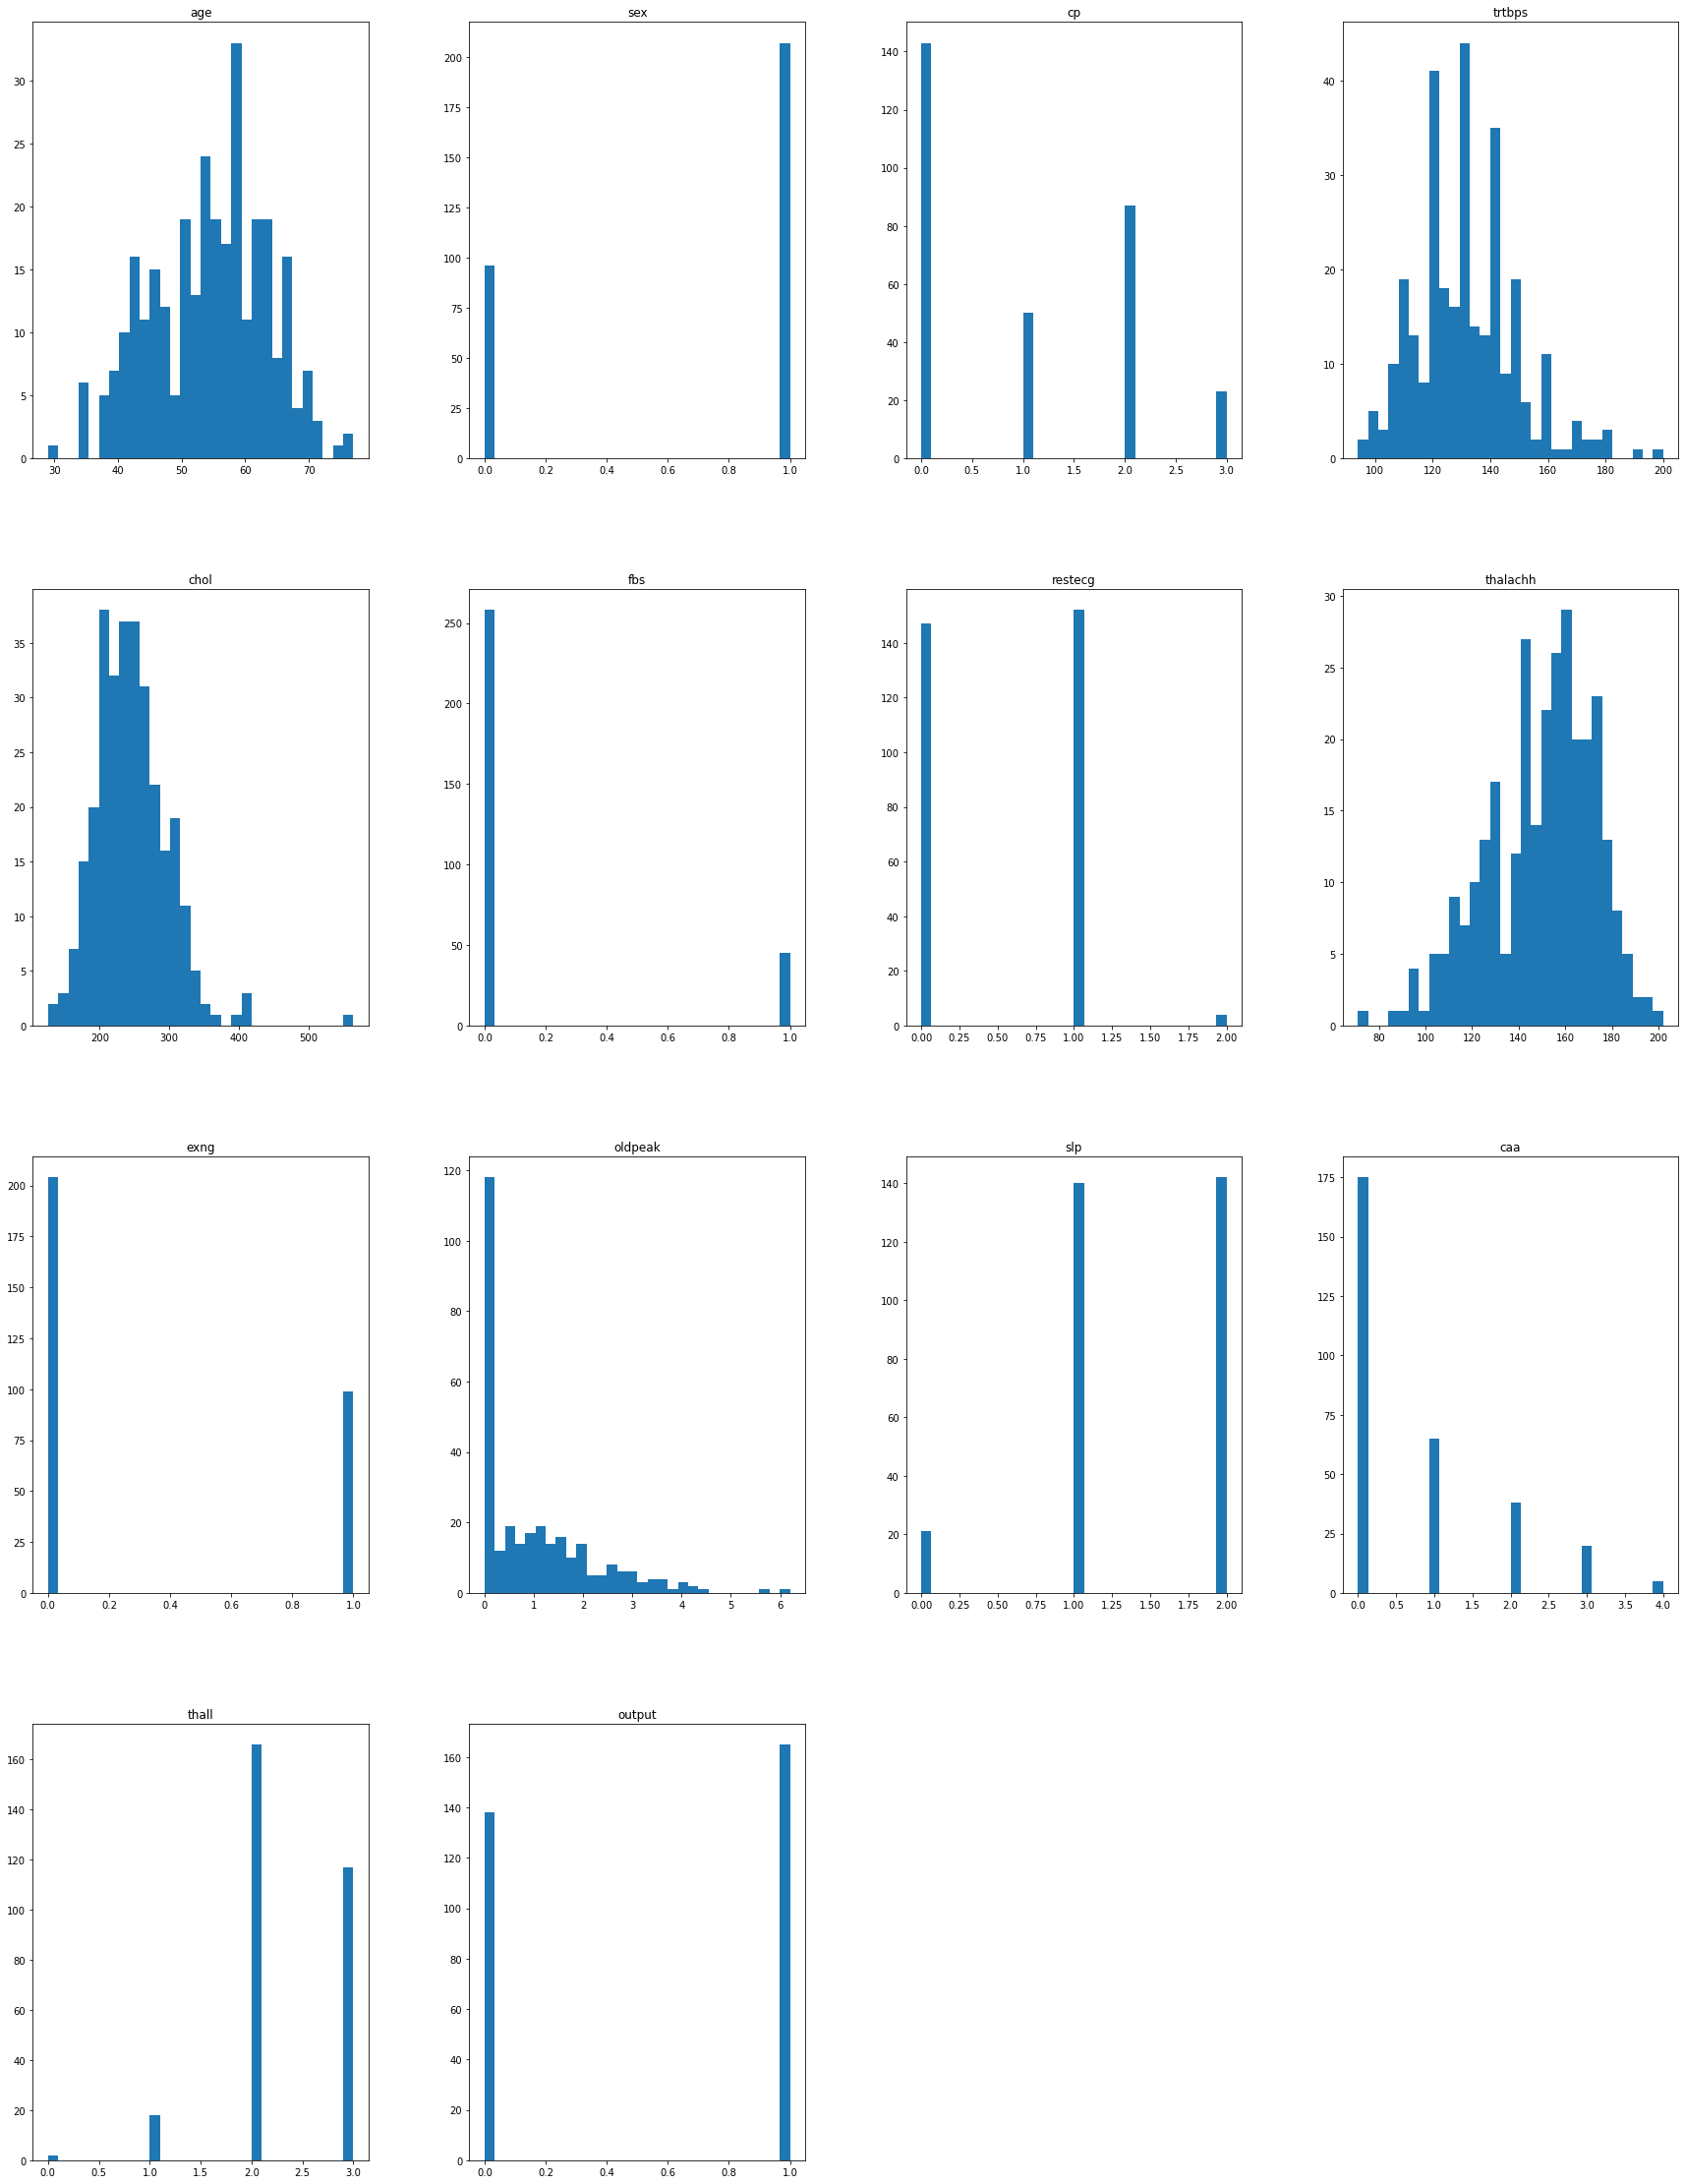

In [9]:
#plotting histograms for columns to see distribution 
df.hist(bins = 30 , layout = (4,4), figsize = (30,40)  ,column = df.columns[0:], grid = False)
plt.show()

from the above we can see that age , RBP , cholesterol and max BP values follow a normal distribution. Note that some of the features have outliers. (cholesterol and resting BP).
- Oldpeak (ST depression induced by exercise relative to rest) - population sample mostly at 0 with some individuals having a higher count. (to explore further)

- the remaining features are mostly categorical features



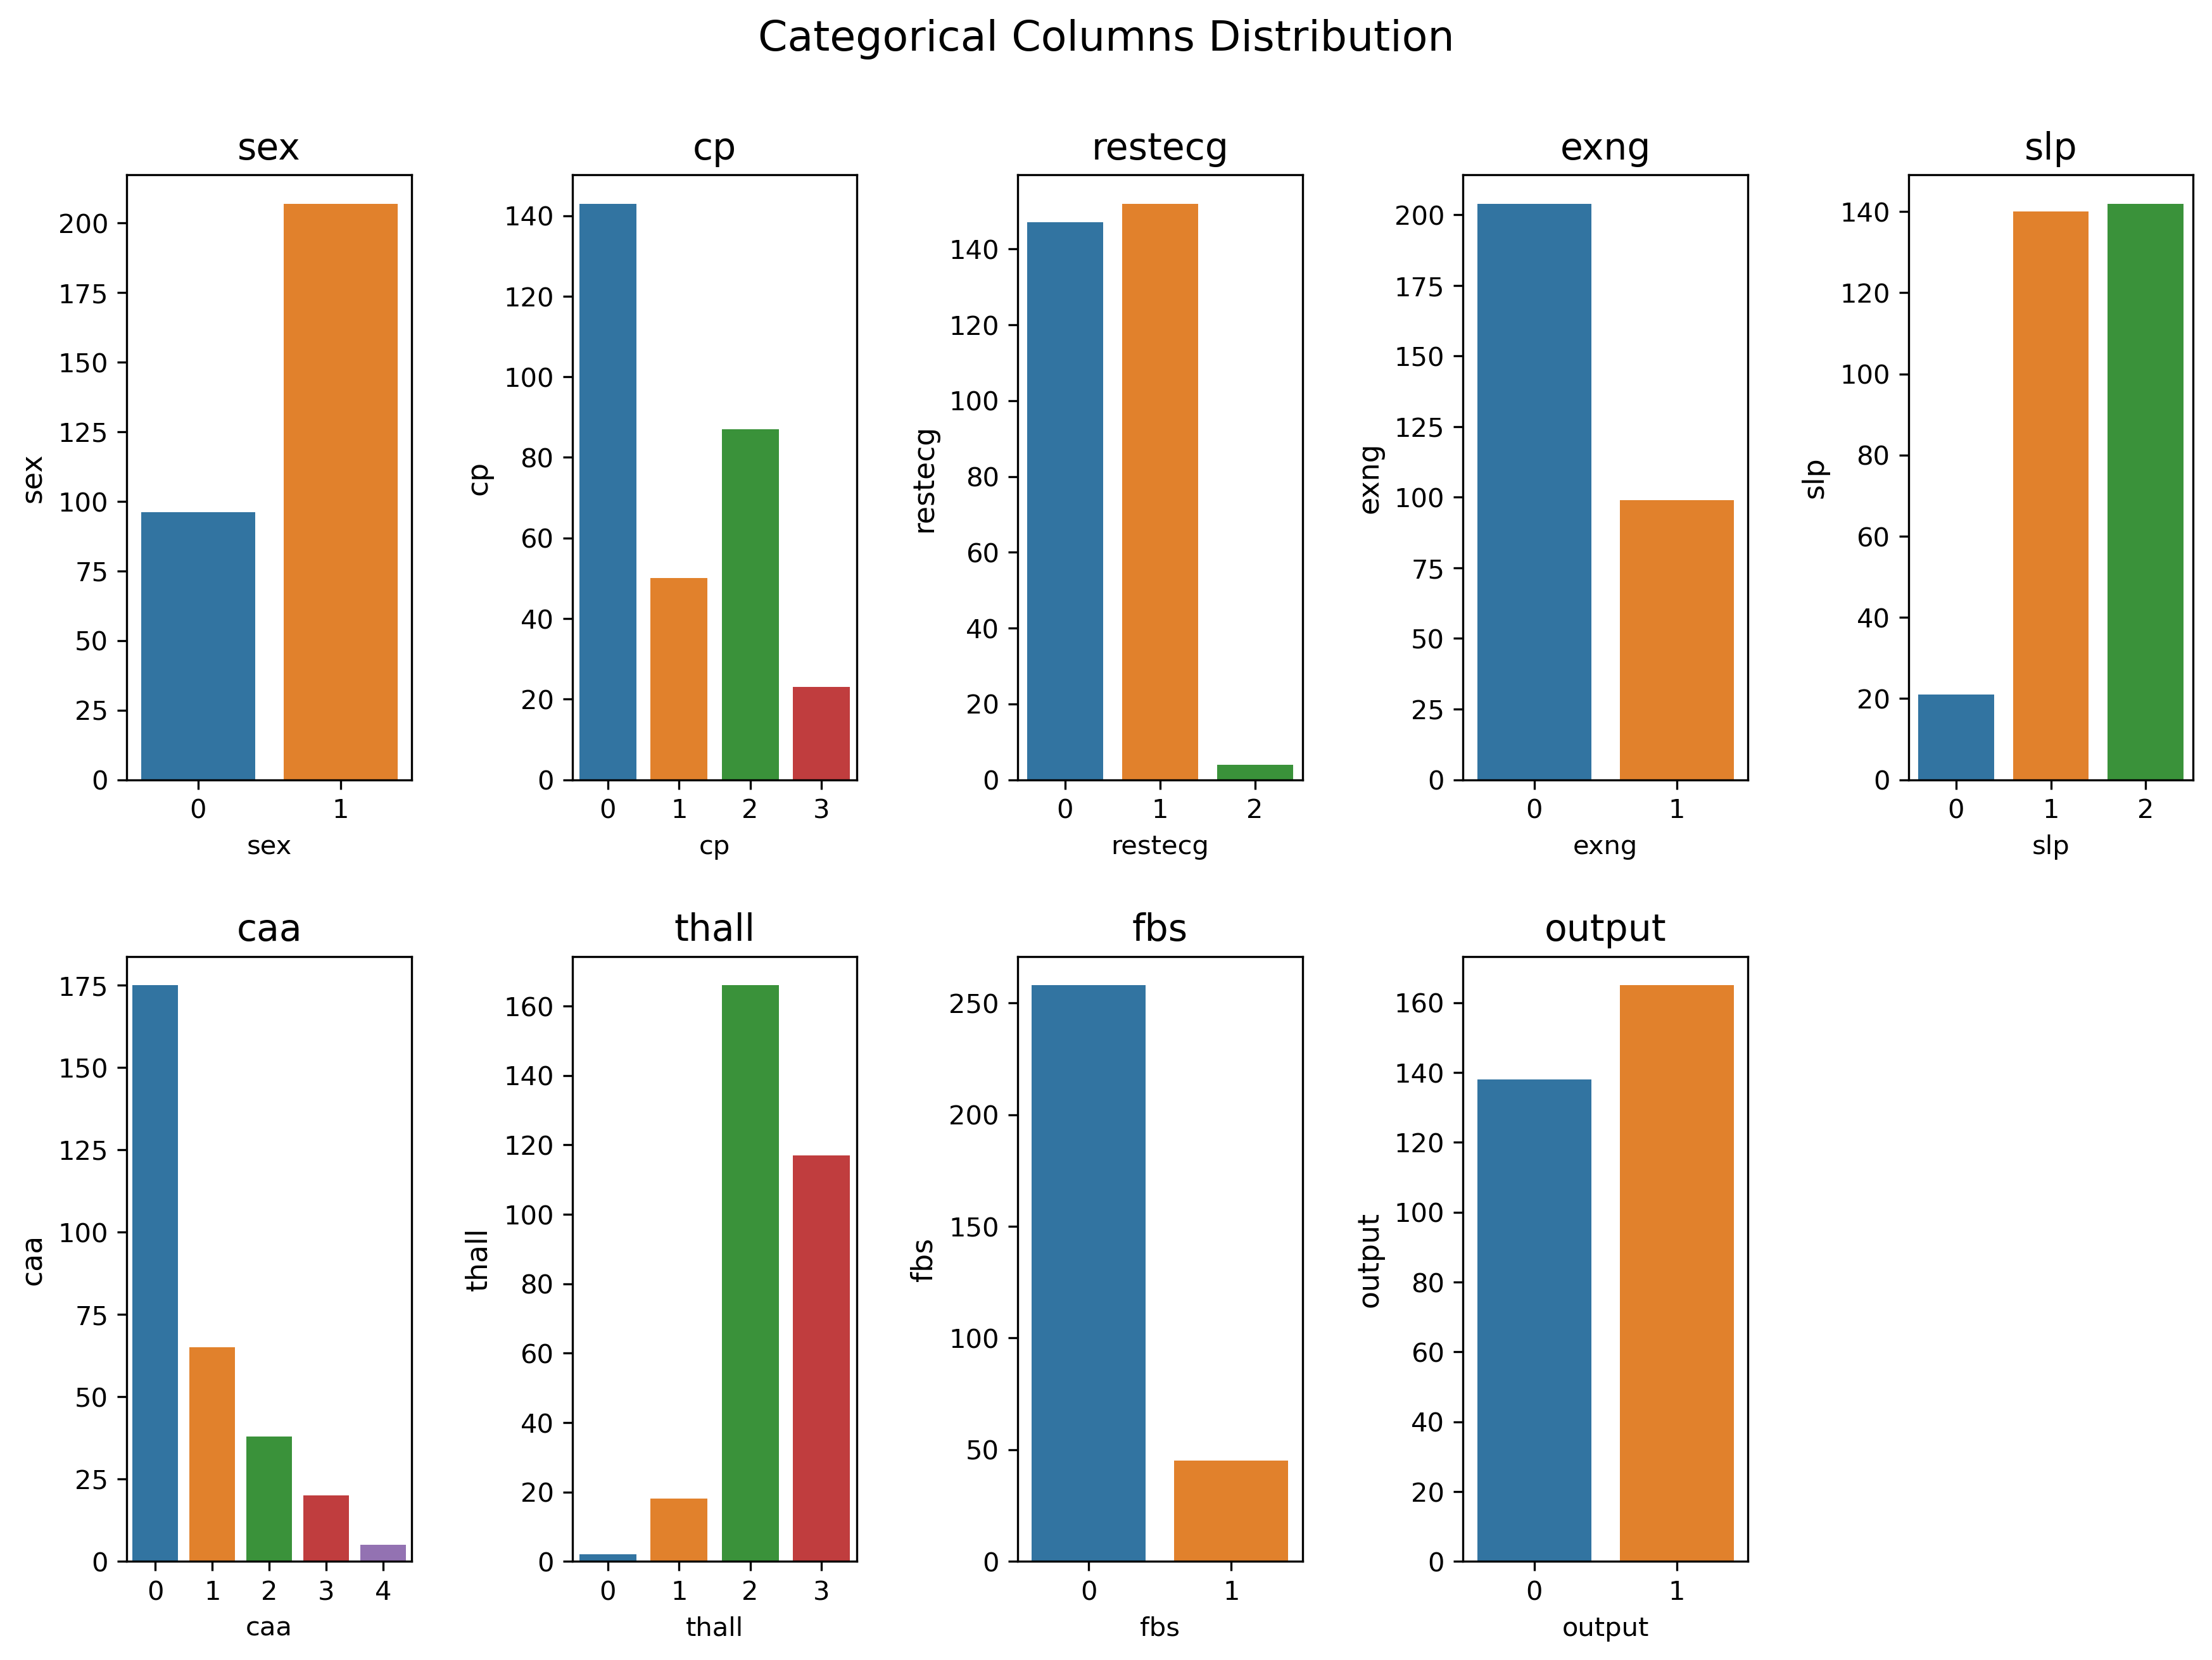

In [10]:
#lets check the distribution of categorical columns
cols=['sex','cp','restecg','exng','slp','caa','thall','fbs','output']

fig=plt.figure(figsize=(12,9),dpi=300)

fig.suptitle('Categorical Columns Distribution', fontsize=16)

x=1

for i in range(len(cols)):
    fig.add_subplot(2, 5, i+1)
    plt.title(cols[i], fontsize=14)
    sns.countplot(data=df, x=cols[i], linewidth=2)
    plt.ylabel(cols[i], fontsize=11)
    
fig.tight_layout(pad=2.0)

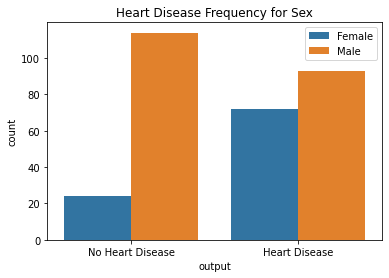

In [11]:
#lets check the frequency of heart disease by sex

fig = sns.countplot(x = 'output', data = df, hue = 'sex')
fig.set_xticklabels(labels=["No Heart Disease", 'Heart Disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

From internet sources:
- Men generally develop CVD at a younger age and have a higher risk of coronary heart disease (CHD) than women. Women, in contrast, are at a higher risk of stroke, which often occurs at older age.

- Overall, it appears that men's coping with stressful events may be less adaptive physiologically, behaviorally, and emotionally, contributing to their increased risk for CHD.

However, from the above EDA distribution, note that Male samples from the population are higher and therefore this will not prove / justify our assumptions.

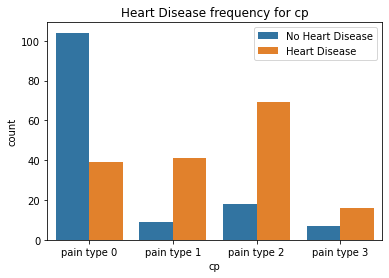

In [13]:
#lets look in detail on chest pains feature

fig = sns.countplot(x = 'cp', data = df, hue = 'output')
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease frequency for cp");

Chest pain type 1 through 3 are more indicative factors for heart disease. This feature will likely play a role in our modelling (we shall explore correlations later)

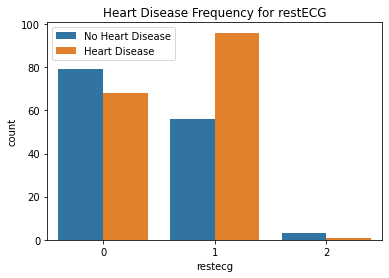

In [14]:
#lets look in detail on restECG feature
fig = sns.countplot(x = 'restecg', data = df, hue = 'output')
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease Frequency for restECG");

relatively evenly ratios between which restecg category however note that disease more prominent in class 1 (higher ratio)

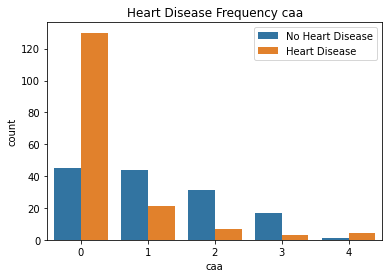

In [15]:
#lets look in detail on ca (number of major vessels (0-3)) feature
fig = sns.countplot(x = 'caa', data = df, hue = 'output')
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease Frequency caa");

note from dataset that this data is supposed to have an indicator for 0 - 3 vessels coloured by Fluoroscopy. We see 5 categories here.

Typically, the more the Number of Major Vessels Colored by Fluoroscopy, the higher the risk of heart disease. However, it seems that value 0 and 4 have more disease prevelent individuals than the others

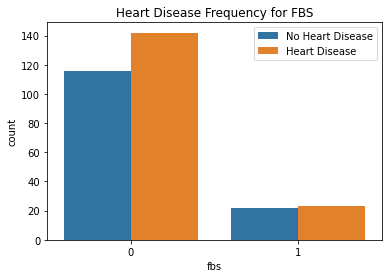

In [16]:
#lets look in detail on fbs feature
fig = sns.countplot(x = 'fbs', data = df, hue = 'output')
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease Frequency for FBS");

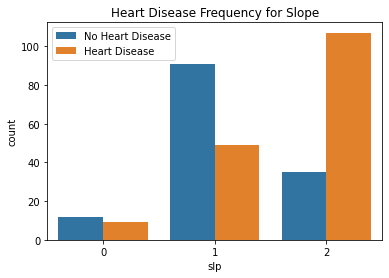

In [17]:
#lets look in detail on slope feature
fig = sns.countplot(x = 'slp', data = df, hue = 'output')
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease Frequency for Slope");

Typically, Peak Exercise ST Segment flat or downslope has lesser risk than upsloping. From the data we can presumme that 2 would refer to upslope feature.

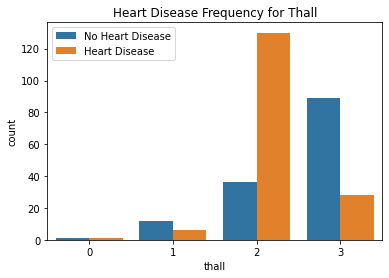

In [18]:
#lets look in detail on thal feature
fig = sns.countplot(x = 'thall', data = df, hue = 'output')
plt.legend(['No Heart Disease', 'Heart Disease']);
plt.title("Heart Disease Frequency for Thall");

Thalium Test: A thallium stress test is a nuclear imaging test that shows how well blood flows into your heart while you’re exercising or at rest.
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

Typically reversable defects indicates no reaction when on rest. Therefore, the process can be reversed as it was not always there, which shows a presence of a dead heart muscle under stress when compared to the previous MI results. This reversible defect shows artery blockage and results in heart failure if not treated timely

As seen, people with reversable defects are more likely to suffer from heart attack

In [19]:
df["thall"].value_counts()

2    166
3    117
1     18
0      2
Name: thall, dtype: int64

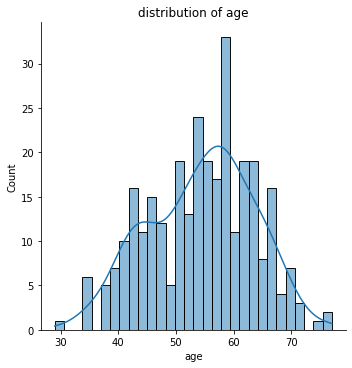

In [20]:
#create a distribution plot with normal distribution curve
sns.displot( x = 'age', data = df, bins = 30, kde = True)
plt.title("distribution of age");
plt.show();

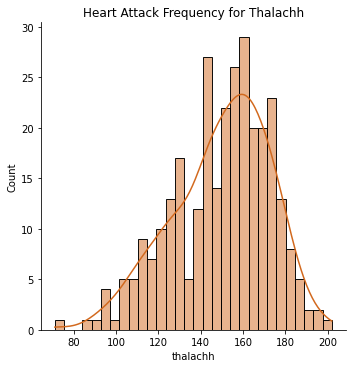

In [21]:
sns.displot(x = 'thalachh', data = df, bins = 30, kde = True, color = 'chocolate')
plt.title("Heart Attack Frequency for Thalachh");
plt.show();

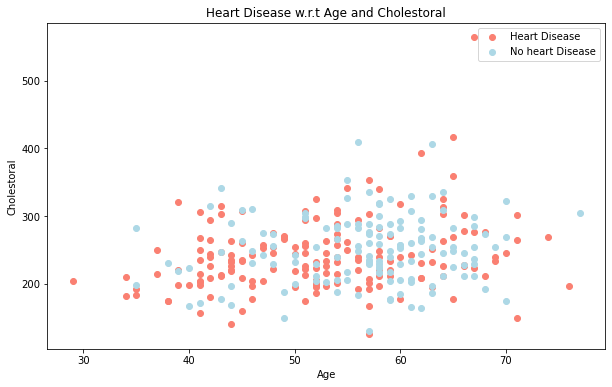

In [22]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.output==1], 
            df.chol[df.output==1], 
            c="salmon") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.output==0], 
            df.chol[df.output==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Cholestoral")
plt.xlabel("Age")
plt.legend(["Heart Disease", "No heart Disease"])
plt.ylabel("Cholestoral");

In [23]:
### add comments

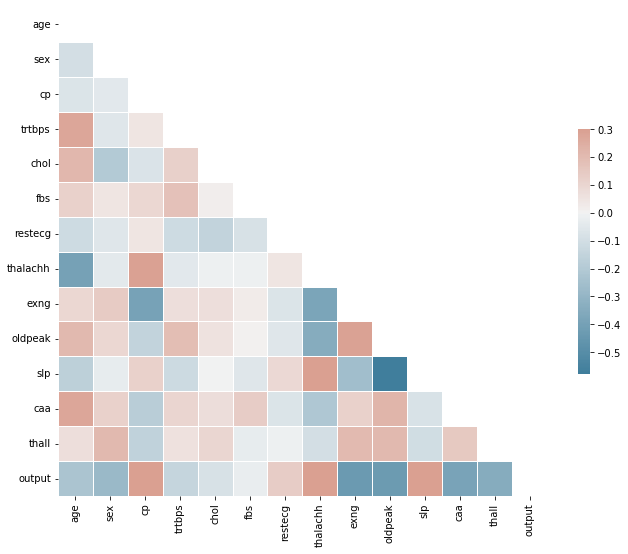

In [24]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

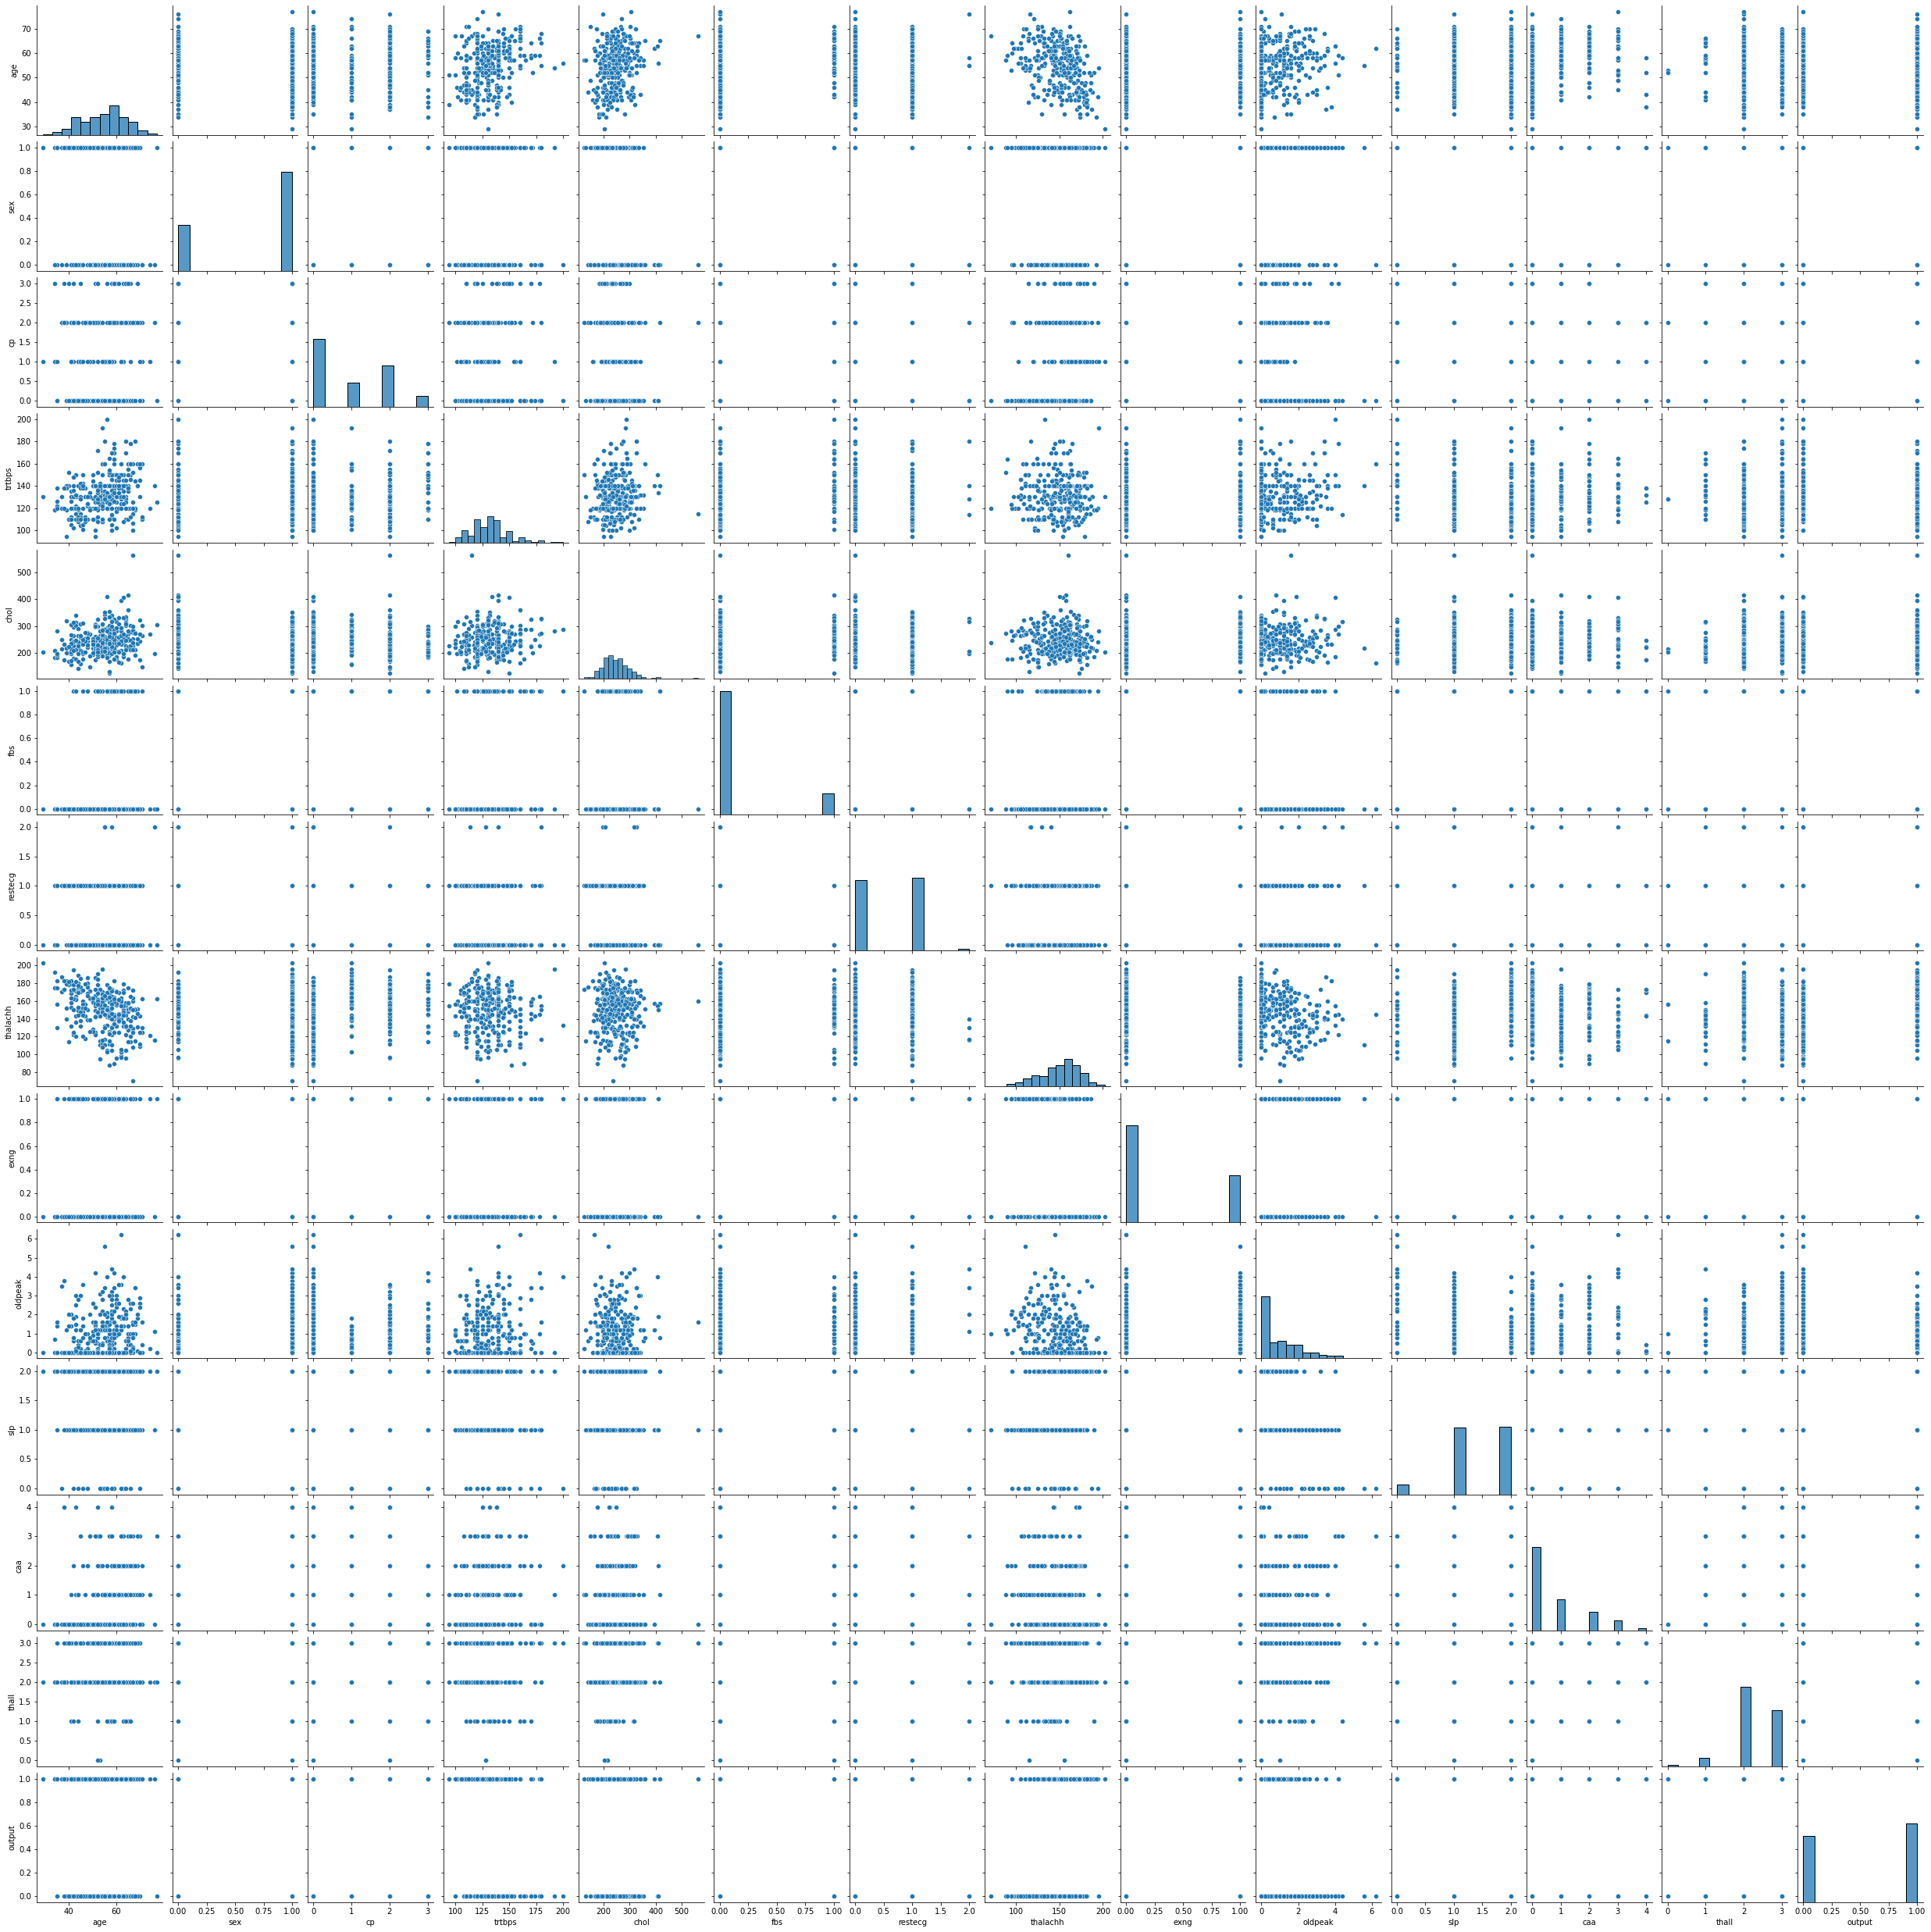

In [25]:
# Visvalization the data
sns.pairplot(df);

# Train Test Split

In [26]:
# Assigning the features to their own dataframe to prevent data leakage
X_train = df.drop(['output'], axis = 1)

y_train = df['output']

#Perform train-test split to obtain training & validation set from the "TRAIN" data. this is to avoid any potential data leakage
X_train, X_test, y_train, y_test = train_test_split(X_train, 
                                                    y_train,
                                                    random_state=42,
                                                    test_size=0.3, 
                                                    stratify=y_train)

In [27]:
#scaling of data
scaler = MinMaxScaler()

Z_train = scaler.fit_transform(X_train)
Z_test = scaler.transform(X_test)

In [28]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
66,51,1,2,100,222,0,1,143,1,1.2,1,0,2
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,56,1,2,130,256,1,0,142,1,0.6,1,1,1
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2


# Modeling

In [29]:
# Set up Pipelines for the different models

# Logistic Regression Pipeline 
pipe_lr = Pipeline([
    ('lr', LogisticRegression())
])
# Random Forest Pipeline 
pipe_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

# Decision Tree 
pipe_dt = Pipeline([
    ('dt', DecisionTreeClassifier())
])

# k-Nearest Neighbors 
pipe_knn = Pipeline([
    ('knn', KNeighborsClassifier())
])

# AdaBoost 
pipe_ada = Pipeline([
    ('ada', AdaBoostClassifier())
])

# XGBoost 
pipe_xgb = Pipeline([
    ('xgb',xgb.XGBClassifier())
])  

# Gradient Boosting 
pipe_gb = Pipeline([
    ('gb',GradientBoostingClassifier())
])

# SVM
pipe_svm = Pipeline([
    ('svm', SVC(probability=True))
])

In [30]:
# Set up Parameters for the different models

params_lr = {
    'lr__C': [100, 10, 8,  1.0, 0.1, 0.01],
    'lr__solver': ['liblinear'],
    'lr__penalty': ['l1','l2'],
    'lr__max_iter': [100, 500, 1000]
}

params_rf = {
    "rf__n_estimators": [50,100,150],
    "rf__max_depth": [3,5,7],
    "rf__min_samples_leaf": [3,5,7],
    'rf__min_samples_split': [3,4,5],
}

params_dt = {
    'dt__criterion' : ['gini', 'entropy'],
    'dt__max_depth' : [3, 5, 10, 20, 50, 100],
    'dt__min_samples_split' : [3, 5, 7],
    'dt__min_samples_leaf' : [1, 2, 3]
}
                
params_knn = {
    'knn__n_neighbors': [4,5,7,8,9,10],
    'knn__weights': ['uniform', 'distance']
}

params_ada = {
    "ada__learning_rate": [0.5, 1],
    "ada__n_estimators": [75,100,500, 700],
}

params_xgb = {
    'xgb__max_depth': [1,3,5],
    'xgb__n_estimators': [2,5,10],
    'xgb__learning_rate': [0.01, 0.1, 0.5],
}

params_gb ={
    'gb__n_estimators': [50, 100, 200, 300],
    'gb__max_depth':[ 3, 5, 7],
    'gb__learning_rate': [0.01, 0.1, 1],
    'gb__min_samples_split' : [2,5,10],
    'gb__min_samples_leaf' : [1,2,4,7],
}

params_svm = {
    'svm__C': [0.1, 1, 10,50, 100, 1000,1500,2000],           
    'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'svm__kernel': ['poly','rbf', 'sigmoid','linear']
} 

In [31]:
#Create a dictionary to house the different models score
results = {}

In [32]:
# Define function to run GridSearchCV for each model
def run_model_gs(pipeline, parameters, cv = 3, model_name = '', prefix = ''):
    gs = GridSearchCV(pipeline, parameters, cv = cv, n_jobs = -1, verbose = 1)
    gs.fit(Z_train, y_train)

    # Print the best score found on training data
    print('Best Score:', gs.best_score_)
    # Print the best parameters found on training data
    print('Best Parameters:', gs.best_params_)
    # Use the best estimator that gave the highest score
    gs = gs.best_estimator_

    #Score model on Training data
    train_score = round(gs.score(Z_train, y_train),3)
    print('Score on Training Data:', train_score)
    # Score model on Testing data
    test_score = round(gs.score(Z_test, y_test),3)
    print('Score on Testing Data:', test_score)
    # Generalisation Score
    generalisation = round((train_score - test_score)*100/train_score,3)
    print('Generalisation Score:', generalisation)
    # Get predictions
    y_pred = gs.predict(Z_test)

    # Calculate ROC_AUC score
    y_proba = gs.predict_proba(Z_test)
    auc = round(roc_auc_score(y_test, y_proba[:,1]),4)

    # Confusion Matrix
    create_cm(y_test, y_pred, model_name)

    # Save performance metrics value
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    # Print the different metrics
    # Append metrics and scores to the dictionary
    accuracy = round(accuracy_score(y_test, y_pred),3) # Accuracy 
    print('Accuracy:', accuracy)
    precision = round(tp / (tp + fp),3) # Precision (Positive Predictive Value)
    print('Precision:', precision)
    recall = round(tp / (tp + fn),3) # Recall (Sensitivity, True Positive Rate)
    print('Recall:', recall)
    specificity = round(tn / (tn + fp),3) # Specificity (True Negative Rate)
    f1 = round(2 * (precision * recall) / (precision + recall),3) #F1
    print('F1:', f1)
    print('ROC AUC:', auc)
    
    results[model_name] = [train_score, test_score, generalisation, accuracy, precision, recall, specificity, f1, auc]
    
    # pickle the model
    gs_file = './models/gs_'+prefix+'.sav'
    pickle.dump(gs, open(gs_file, 'wb'))
    
    return gs

In [33]:
#Initialise Confusion Matrix visualisation
def create_cm(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test,y_pred)
    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot(cmap='Blues')
    disp.ax_.set_title(model_name)
    plt.show()

### Logistic Regression Model

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Score: 0.8633132126089872
Best Parameters: {'lr__C': 8, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Score on Training Data: 0.868
Score on Testing Data: 0.758
Generalisation Score: 12.673


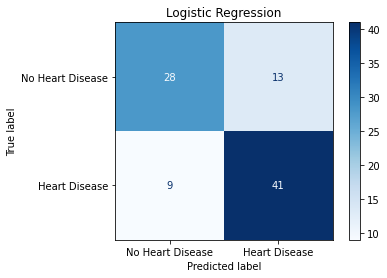

Accuracy: 0.758
Precision: 0.759
Recall: 0.82
F1: 0.788
ROC AUC: 0.8634


In [34]:
lr_optimal_model = run_model_gs(pipe_lr, params_lr, model_name = 'Logistic Regression',prefix='lr')

### k-Nearest Neighbour Classification

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Score: 0.8302481556002683
Best Parameters: {'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Score on Training Data: 0.863
Score on Testing Data: 0.78
Generalisation Score: 9.618


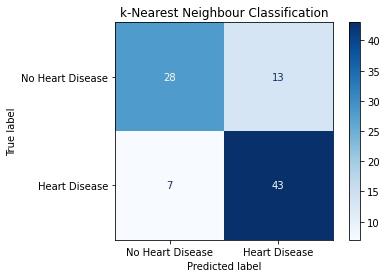

Accuracy: 0.78
Precision: 0.768
Recall: 0.86
F1: 0.811
ROC AUC: 0.8449


In [35]:
knn_optimal_model = run_model_gs(pipe_knn, params_knn, model_name = 'k-Nearest Neighbour Classification',prefix='knn')

### Random Forest

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Score: 0.8680751173708919
Best Parameters: {'rf__max_depth': 3, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 3, 'rf__n_estimators': 100}
Score on Training Data: 0.887
Score on Testing Data: 0.802
Generalisation Score: 9.583


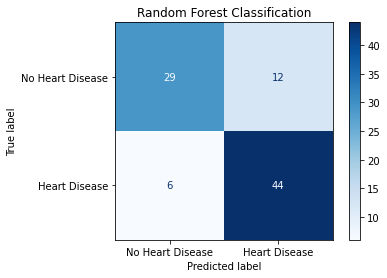

Accuracy: 0.802
Precision: 0.786
Recall: 0.88
F1: 0.83
ROC AUC: 0.8654


In [36]:
rf_optimal_model = run_model_gs(pipe_rf, params_rf, model_name = 'Random Forest Classification', prefix='rf')

### Support Vector Classification

Fitting 3 folds for each of 160 candidates, totalling 480 fits
Best Score: 0.8680751173708919
Best Parameters: {'svm__C': 100, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}
Score on Training Data: 0.873
Score on Testing Data: 0.769
Generalisation Score: 11.913


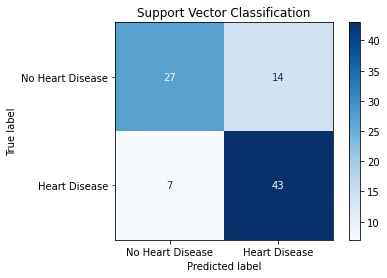

Accuracy: 0.769
Precision: 0.754
Recall: 0.86
F1: 0.804
ROC AUC: 0.8624


In [37]:
svm_optimal_model = run_model_gs(pipe_svm, params_svm, model_name = 'Support Vector Classification', prefix='svm')

### Decision Tree Classification

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Score: 0.8113346747149563
Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
Score on Training Data: 0.868
Score on Testing Data: 0.747
Generalisation Score: 13.94


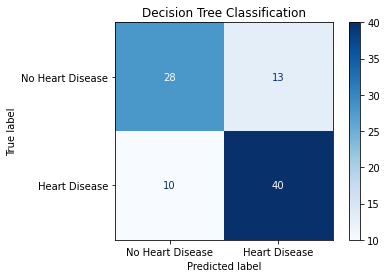

Accuracy: 0.747
Precision: 0.755
Recall: 0.8
F1: 0.777
ROC AUC: 0.7549


In [38]:
dt_optimal_model = run_model_gs(pipe_dt, params_dt, model_name = 'Decision Tree Classification', prefix='dt')

### XGBoost Classification

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Score: 0.8209926224010732
Best Parameters: {'xgb__learning_rate': 0.5, 'xgb__max_depth': 1, 'xgb__n_estimators': 5}
Score on Training Data: 0.868
Score on Testing Data: 0.758
Generalisation Score: 12.673


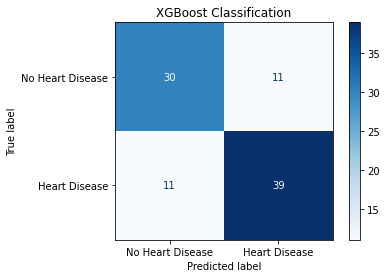

Accuracy: 0.758
Precision: 0.78
Recall: 0.78
F1: 0.78
ROC AUC: 0.8554


In [39]:
xgb_optimal_model = run_model_gs(pipe_xgb, params_xgb, model_name = 'XGBoost Classification', prefix='xgb')

### AdaBoost Classification

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Score: 0.7974513749161637
Best Parameters: {'ada__learning_rate': 0.5, 'ada__n_estimators': 100}
Score on Training Data: 0.934
Score on Testing Data: 0.736
Generalisation Score: 21.199


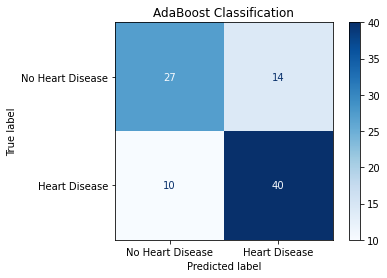

Accuracy: 0.736
Precision: 0.741
Recall: 0.8
F1: 0.769
ROC AUC: 0.8415


In [40]:
ada_optimal_model = run_model_gs(pipe_ada, params_ada, model_name = 'AdaBoost Classification',prefix='ada')


### Gradient Boosting

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Score: 0.8537894030851777
Best Parameters: {'gb__learning_rate': 0.1, 'gb__max_depth': 3, 'gb__min_samples_leaf': 1, 'gb__min_samples_split': 5, 'gb__n_estimators': 100}
Score on Training Data: 1.0
Score on Testing Data: 0.758
Generalisation Score: 24.2


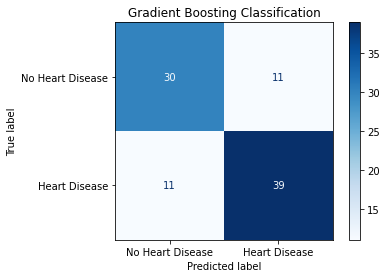

Accuracy: 0.758
Precision: 0.78
Recall: 0.78
F1: 0.78
ROC AUC: 0.8454


In [41]:
gb_optimal_model = run_model_gs(pipe_gb, params_gb, model_name = 'Gradient Boosting Classification',prefix='gb')

### Results

In [42]:
results_df = pd.DataFrame(results, index=['Train score', 'Test score', 'Generalisation','Accuracy', 'Precision', 'Recall', 'Specificity','F1', 'ROC AUC']).T
results_df       

,Train score,Test score,Generalisation,Accuracy,Precision,Recall,Specificity,F1,ROC AUC
Logistic Regression,0.868,0.758,12.673,0.758,0.759,0.82,0.683,0.788,0.8634
k-Nearest Neighbour Classification,0.863,0.780,9.618,0.780,0.768,0.86,0.683,0.811,0.8449
Random Forest Classification,0.887,0.802,9.583,0.802,0.786,0.88,0.707,0.830,0.8654
Support Vector Classification,0.873,0.769,11.913,0.769,0.754,0.86,0.659,0.804,0.8624
Decision Tree Classification,0.868,0.747,13.940,0.747,0.755,0.80,0.683,0.777,0.7549
XGBoost Classification,0.868,0.758,12.673,0.758,0.780,0.78,0.732,0.780,0.8554
AdaBoost Classification,0.934,0.736,21.199,0.736,0.741,0.80,0.659,0.769,0.8415
Gradient Boosting Classification,1.000,0.758,24.200,0.758,0.780,0.78,0.732,0.780,0.8454


In [55]:
markdown_table = results_df.to_markdown()
markdown_table

'|                                    |   Train score |   Test score |   Generalisation |   Accuracy |   Precision |   Recall |   Specificity |    F1 |   ROC AUC |\n|:-----------------------------------|--------------:|-------------:|-----------------:|-----------:|------------:|---------:|--------------:|------:|----------:|\n| Logistic Regression                |         0.868 |        0.758 |           12.673 |      0.758 |       0.759 |     0.82 |         0.683 | 0.788 |    0.8634 |\n| k-Nearest Neighbour Classification |         0.863 |        0.78  |            9.618 |      0.78  |       0.768 |     0.86 |         0.683 | 0.811 |    0.8449 |\n| Random Forest Classification       |         0.887 |        0.802 |            9.583 |      0.802 |       0.786 |     0.88 |         0.707 | 0.83  |    0.8654 |\n| Support Vector Classification      |         0.873 |        0.769 |           11.913 |      0.769 |       0.754 |     0.86 |         0.659 | 0.804 |    0.8624 |\n| Decision Tree

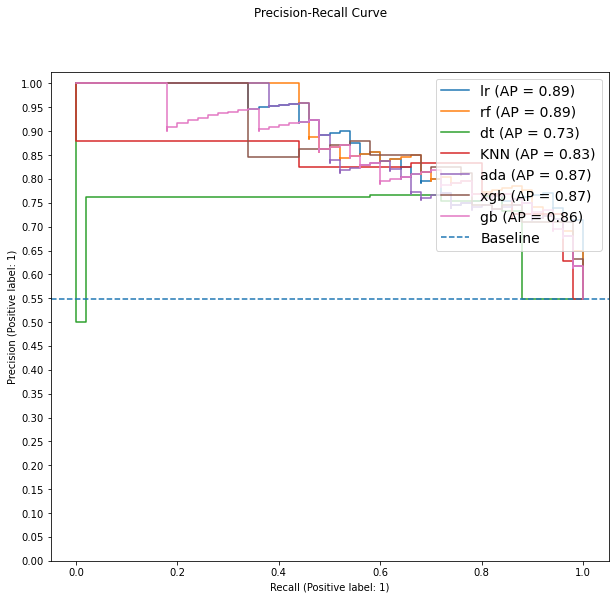

In [43]:
# Comparing Precision-Recall Curve
plt.rcParams['figure.figsize'] = (10,9)

# AP score after each model summarizes Precision-Recall curve 

# as the weighted mean of precision acheived at each threshold

fig=PrecisionRecallDisplay.from_estimator(lr_optimal_model, Z_test, y_test,name="lr")
PrecisionRecallDisplay.from_estimator(rf_optimal_model, Z_test, y_test, name="rf", ax= fig.ax_)
PrecisionRecallDisplay.from_estimator(dt_optimal_model, Z_test, y_test, name="dt", ax= fig.ax_) 
PrecisionRecallDisplay.from_estimator(knn_optimal_model, Z_test, y_test, name="KNN", ax= fig.ax_) 
PrecisionRecallDisplay.from_estimator(ada_optimal_model, Z_test, y_test, name="ada", ax= fig.ax_)  
PrecisionRecallDisplay.from_estimator(xgb_optimal_model, Z_test, y_test, name="xgb", ax= fig.ax_) 
PrecisionRecallDisplay.from_estimator(gb_optimal_model, Z_test, y_test, name="gb", ax= fig.ax_)
baseline = len(y_test[y_test==1]) / len(y_test)
plt.axhline(y=baseline, linestyle='--', label = "Baseline")

plt.legend(loc='upper right', fontsize=14)
fig.ax_.set_yticks(np.arange(0, 1.05, 0.05))
fig.figure_.suptitle("Precision-Recall Curve")
plt.show()

In [44]:
# Load the pickled model
gs_lr = pickle.load(open('./models/gs_lr.sav', 'rb'))
gs_rf = pickle.load(open('./models/gs_rf.sav', 'rb'))
gs_dt = pickle.load(open('./models/gs_dt.sav', 'rb'))
gs_knn = pickle.load(open('./models/gs_knn.sav', 'rb'))
gs_ada= pickle.load(open('./models/gs_ada.sav', 'rb'))
gs_xgb = pickle.load(open('./models/gs_xgb.sav', 'rb'))
gs_gb = pickle.load(open('./models/gs_gb.sav', 'rb'))
gs_svm = pickle.load(open('./models/gs_svm.sav', 'rb'))

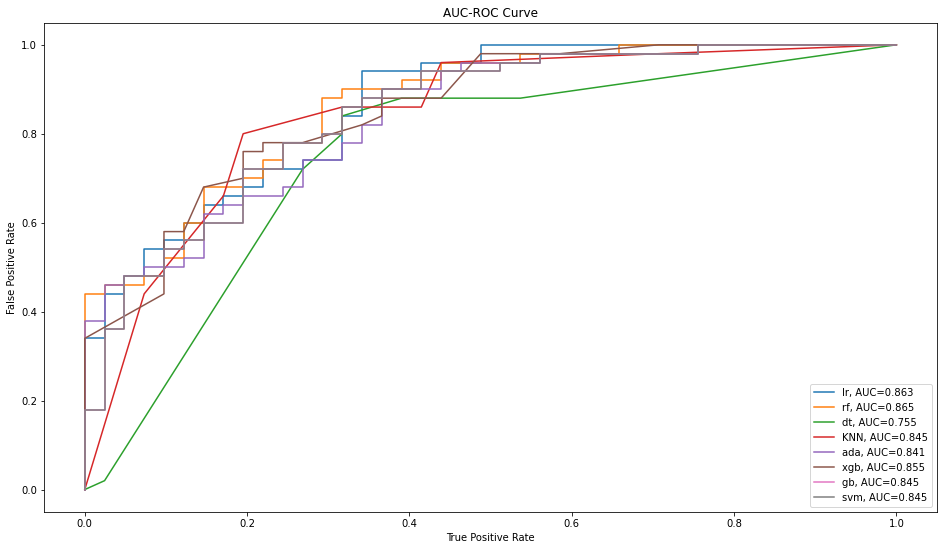

In [45]:
from sklearn import metrics

y_pred_lr = gs_lr.predict_proba(Z_test)[::,1]
y_pred_rf = gs_rf.predict_proba(Z_test)[::,1]
y_pred_dt = gs_dt.predict_proba(Z_test)[::,1]
y_pred_knn = gs_knn.predict_proba(Z_test)[::,1]
y_pred_ada = gs_ada.predict_proba(Z_test)[::,1]
y_pred_xgb = gs_xgb.predict_proba(Z_test)[::,1]
y_pred_gb = gs_gb.predict_proba(Z_test)[::,1]
y_pred_svm = gs_svm.predict_proba(Z_test)[::,1]

lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test,  y_pred_lr)
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test,  y_pred_rf)
dt_fpr, dt_tpr, _ = metrics.roc_curve(y_test,  y_pred_dt)
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test,  y_pred_knn)
ada_fpr, ada_tpr, _ = metrics.roc_curve(y_test,  y_pred_ada)
xgb_fpr, xgb_tpr, _ = metrics.roc_curve(y_test,  y_pred_xgb)
gb_fpr, gb_tpr, _ = metrics.roc_curve(y_test,  y_pred_gb)
svm_fpr, svm_tpr, _ = metrics.roc_curve(y_test,  y_pred_gb)


#auc1 = metrics.roc_auc_score(y_test, y_pred_base)
auc2 = metrics.roc_auc_score(y_test, y_pred_lr)
auc3 = metrics.roc_auc_score(y_test, y_pred_rf)
auc4 = metrics.roc_auc_score(y_test, y_pred_dt)
#auc5 = metrics.roc_auc_score(y_test, y_pred_mnb)
auc6 = metrics.roc_auc_score(y_test, y_pred_knn)
auc7 = metrics.roc_auc_score(y_test, y_pred_ada)
auc8 = metrics.roc_auc_score(y_test, y_pred_xgb)
auc9 = metrics.roc_auc_score(y_test, y_pred_gb)
auc10 = metrics.roc_auc_score(y_test, y_pred_svm)

plt.figure(figsize=(16,9)).clf()
#create ROC curve
#plt.plot(base_fpr, base_tpr,label="AUC_base="+str(round(auc1,3)))
plt.plot(lr_fpr, lr_tpr,label="lr, AUC="+str(round(auc2,3)))
plt.plot(rf_fpr,rf_tpr,label="rf, AUC="+str(round(auc3,3)))
plt.plot(dt_fpr,dt_tpr,label="dt, AUC="+str(round(auc4,3)))
#plt.plot(mnb_fpr,mnb_tpr,label="AUC_mnb="+str(round(auc5,3)))
plt.plot(knn_fpr,knn_tpr,label="KNN, AUC="+str(round(auc6,3)))
plt.plot(ada_fpr,ada_tpr,label="ada, AUC="+str(round(auc7,3)))
plt.plot(xgb_fpr,xgb_tpr,label="xgb, AUC="+str(round(auc8,3)))
plt.plot(gb_fpr,gb_tpr,label="gb, AUC="+str(round(auc9,3)))
plt.plot(svm_fpr,svm_tpr,label="svm, AUC="+str(round(auc9,3)))

# axis labels
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')

# show title
plt.title("AUC-ROC Curve")

plt.legend(loc=4);

# plt.savefig("./images/roc_curve.png", format="png")

We can use confusion matrix, AUC ROC curve, MSE, F1 score, etc. for analyzing the model. Each one of them is suited for a specific purpose. We have to decide which one of them to be used, but generally, we can use AUC ROC curve for most of the cases unless explicitly mentioned.

As shown in the chart above, the the random forest classifier has the best performance when compared to the others. This is indicated by the high AUC score (~0.87) this is a good sign that our models will still able to generalise well, even when handling previously unseen data.

## Review model performance in context of Feature Importance

In the section above, we considered how well our selected model (Random Forest) has performed against the other models by key metrics such as ROC-AUC scores and precisions/recalls. However, we also need to think about how the model's decisions/behaviour can be explained in a clear and consistent manner - this is important in a real-world scenario from both a legal and ethical perspective, as we are assessing the prospective risk levels of potential heart disease, Predicting these health risk incorrectly may lead to reputational/ financial damages as well as wrong treatment plans for the individual. 

In this section, we will now consider:

what features have the biggest impact on the Random Forest Classifier model's predictions
how the RF model has generated its predictions based on the values of the most important features.

In [46]:
#Feature importance for our Gradient Boosting classifer
imp_rf = pd.DataFrame(gs_rf.named_steps['rf'].feature_importances_,
                      index=X_train.columns,
                      columns=['weights']).sort_values(by='weights', ascending=False)
imp_rf

,weights
cp,0.202746
thall,0.179988
oldpeak,0.170112
thalachh,0.122517
exng,0.093540
slp,0.070987
caa,0.066655
age,0.030002
chol,0.024474
sex,0.015300


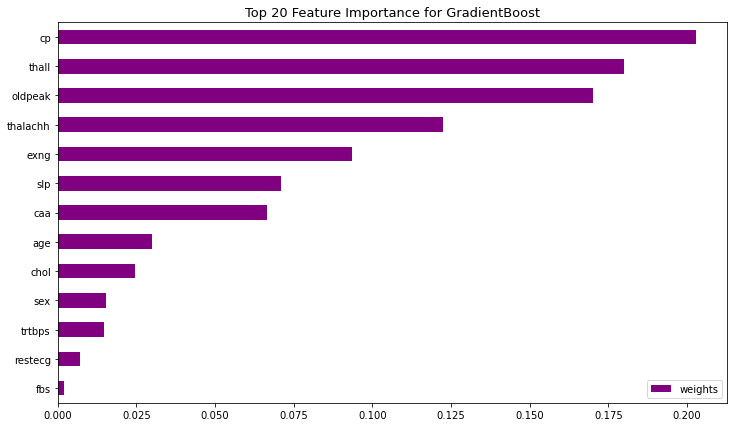

In [47]:
# Plotting Top 20 features in bar chart
imp_rf.head(20).plot(kind='barh', label=imp_rf.columns[:20], figsize=(12,7), color='purple')
plt.title('Top 20 Feature Importance for GradientBoost', fontsize=13)
plt.gca().invert_yaxis()
plt.legend(loc=4);

## SHAP

The SHAP framework is excellent for breaking down predictions in order to show the impact of each feature. This is especially useful for when we want to explain how/why we have classified certain applicants who may have demonstrated high/low risk potential.

The advantage that this approach has over calculating permutation importances alone, is that SHAP values can express whether a feature has a broad effect across all predictions, or whether its effect is more localised for a handful of predictions and negligible in general; permutation importance simply captures the "average" impact of each feature.

Here, we will calculate the SHAP values for the test dataset to visualise how the randomforest model has behaved, based on the values of the most important features.

In [48]:
# SHAP values
import shap

# fit our GB model
gs_rf.fit(X_train, y_train)

# Create object that can calculate shap values
explainer = shap.Explainer(gs_rf.predict, X_test)

# Calculate Shap values
shap_values = explainer(X_test)

Permutation explainer: 92it [00:19,  2.45it/s]                                  


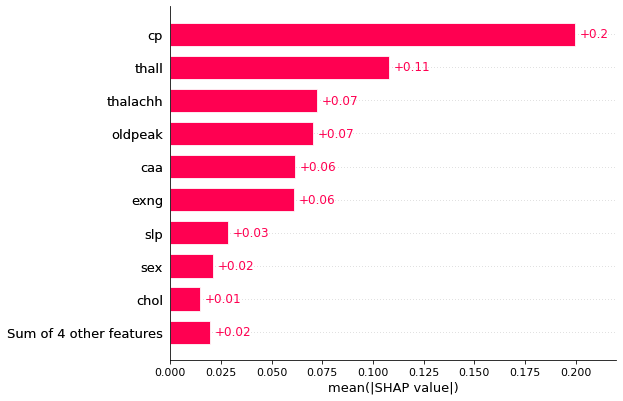

In [49]:
shap.plots.bar(shap_values, max_display=10) # default is max_display=12

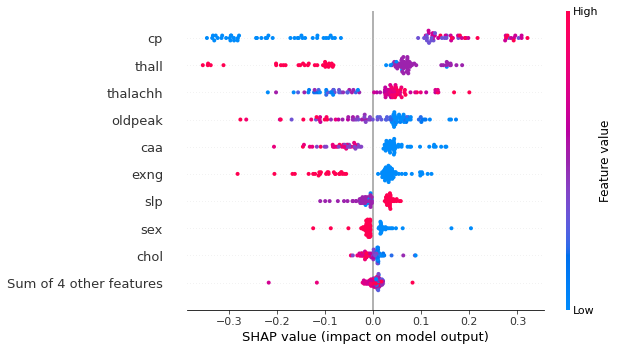

In [50]:
shap.plots.beeswarm(shap_values)

In [51]:
shap.initjs()
shap.plots.force(shap_values[0])

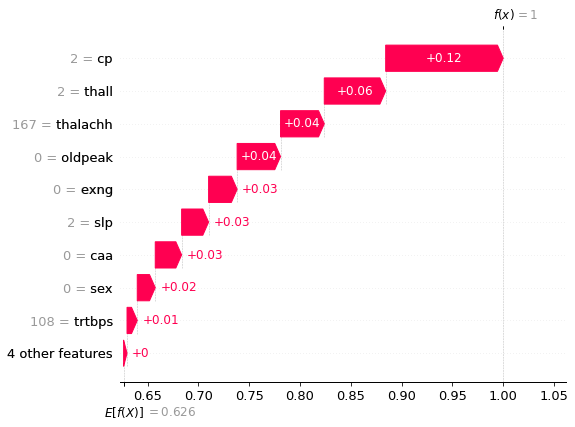

In [52]:
shap.plots.waterfall(shap_values[0])

## Conclusion

* In conclusion, the application of machine learning algorithms to the heart attack dataset has provided significant insights into predicting and preventing heart attacks. The dataset contains a range of demographic, clinical, and lifestyle factors that are known to be associated with heart attack. By analyzing these factors, machine learning models have been developed to predict the occurrence of heart attacks.

* The results of the analysis show that machine learning algorithms such as logistic regression, decision tree, and random forest can accurately predict the occurrence of heart attacks based on several factors such as age, gender, hypertension, smoking habits, and diabetes. These models can be used to identify individuals who are at high risk of developing a heart attack and help healthcare professionals to design effective preventive interventions.

* Moreover, the application of machine learning algorithms to the heart attack dataset has the potential to improve our understanding of the complex relationships between risk factors and the occurrence of heart attacks. This knowledge can help in designing better prevention and treatment strategies for this life-threatening condition.

### Recommendation

* Collect additional data: The heart attack dataset contains a relatively small number of observations, and collecting additional data could help to improve the accuracy and generalizability of machine learning models developed on this dataset.

* Consider including additional features: The heart attack dataset includes a limited number of clinical features, and it may be useful to include additional features that could be predictive of heart attacks. For example, including data on lifestyle factors such as diet and exercise habits could provide additional insight into a patient's risk of suffering a heart attack.

* Use more sophisticated machine learning techniques: While the heart attack dataset has been used to develop predictive models using a range of machine learning algorithms, it may be worthwhile to explore more sophisticated techniques such as deep learning, which have been shown to be effective in other medical applications.

* Validate the models: Once machine learning models have been developed on the heart attack dataset, it is important to validate their performance on new data to ensure that they generalize well. This may involve collecting additional data or using existing datasets to test the models' accuracy and reliability. Further feature engineering and hyperparameter tuning can be performed to optimize the performance of these models. Seems like the more complex models tend to overfit the data by not doing well in generalization.